# **CAPSTONE MODUL 2**

## **Context**

Sebuah perusahaan bergerak di bidang speciality foods ingin mengetahui gambaran umum tentang bisnis yang sedang mereka jalankan. Terdapat sebuah database yang menunjukan detail dari keadaan bisnis di dalamnya. Dari database tersebut, perusahaan ingin bisa mendapatkan insight yang dapat dijalankan, sehingga nantinya mereka dapat melakukan penerapan strategi yang tepat sasaran untuk mengembangkan perusahaan ini.

## **Database Information**

Sumber Database: https://drive.google.com/drive/folders/1fTHrwh_gcLsOFKXHnUzUGEu_APxLoD9i

Database yang dimiliki mempunyai 13 tabel, yaitu:
- orders: berisikan detail transaksi seperti, order id, tanggal pengiriman, lokasi pengiriman, dsb
- employees: berisikan informasi karyawan seperti id, nama, jabatan, tanggal lahir, alamat tinggal, dsb
- employeesterritories: berisikan informasi id karyawan dan id daerah
- territories: berisikan informasi id daerah, dan deskrispsi daerah tersebut
- region: berisikan region id dan region description
- orderdetails: berisikan detail order seperti order id, product id, hargasatuan, quantity, discount
- products: berisikan informasi product seperti product id, supplier id, category, satuan, harga satuan, jumlah stok, jumlah unit dalam pemesanan, dsb
- categories: berisikan informasi kategori seperti, categoryid, categoryname, deskripsi, dan ilustrasi
- suppliers: berisikan informasi supplier seperti nama perusahaan supplier, PIC, jabatan PIC, detail alamat perusahaan supplier, nomor telepon, dsb
- customers: berisikan informasi customer seperti nama perusahaan pemesan, PIC, jabatan PIC, detail alamat perusahaan pemesan, nomor telepon dan
lain sebagainya
- customercustomerdemo & customerdemographics: (tidak ada data yang tersedia)
- shippers: berikan informasi jasa delivery yang digunakan seperti, shipperid, nama perusahaan dan nomor telepon.

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.

# **DATABASE**

## **Connecting To Database**

Bagian ini merupakan langkah awal untuk mulai melakukan proses analisis data. Pertama adalah membuat koneksi ke database, database yang akan digunakan adalah database ``northwind``. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database.


In [1]:
# import libraries
import mysql.connector
import numpy as np
import pandas as pd

# create connection 
mydb = mysql.connector.connect(
    host = "localhost",
    user = "root",
    passwd = "password",
    database = "northwind")

# Second Method
mycursor = mydb.cursor()

# Create Function
def sql_df(yourQuery):
    mycursor.execute(yourQuery)
    myResult = mycursor.fetchall()
    df = pd.DataFrame(myResult, columns = mycursor.column_names)
    return df

In [2]:
sql_df('''
show tables;
''')

,Tables_in_northwind
0,categories
1,customercustomerdemo
2,customerdemographics
3,customers
4,employees
5,employeeterritories
6,orderdetails
7,orders
8,products
9,region


## **Data Detail & ...**

Data pertama ini merupakan data utama yang nantinya akan dianalisa lebih lanjut. Data ini merupakan gabungan dari 5 tabel, yaitu tabel ```suppliers```, ```categories```, ```orderdetails```, ```orders``` dan ```products```. <br> 
Masing-masing dari setiap tabel tersebut diambil beberapa kolomnya dan tidak diambil secara keseluruhan.
Informasi yang diambil antara lain adalah:

Dari tabel suppliers:
- supplierid
- companyname
- contactname
- contacttitle
- city
- country

Dari tabel products:
- productname
- unitsinstock
- unitprice
- reorderlevel

Dari tabel orderdetails:
- quantitiy

Dari tabel order:
- orderdate
- requireddate
- shippeddate
- freight
- shipcity
- shipcountry

Selain dari tabel, terdapat sebuah kolom juga yang dinamakan profitEach yang merupakan selisih antara priceEach (harga jual) dan buyPrice (Harga Beli); juga terdapat kolom yang bernama restStock yang merupakan hasil pengurangan antara quantityInStock dan quantityOrdered. 

Semua informasi tersebut kemudian dijadikan dalam sebuah DataFrame yang nantinya akan diolah informasinya.

**Agar jelas, maka mau menunjukan isi kolom dari masing-masing tabel**

In [3]:
sql_df('''
select * from suppliers
limit 3; 
''')

,SupplierID,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,None,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,LA,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,MI,48104,USA,(313) 555-5735,(313) 555-3349,None


In [4]:
sql_df('''
select * from orders
limit 3; 
''')

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.3800,Vins et alcools Chevalier,59 rue de l-Abbaye,Reims,None,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.6100,Toms Spezialitten,Luisenstr. 48,Mnster,None,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.8300,Hanari Carnes,"Rua do Pao, 67",Rio de Janeiro,RJ,05454-876,Brazil


In [5]:
sql_df('''
select * from orderdetails
limit 3;
''')

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.0000,12,0.0
1,10248,42,9.8000,10,0.0
2,10248,72,34.8000,5,0.0


In [6]:
sql_df('''
select * from products
limit 3;
''')

,ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.0000,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.0000,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.0000,13,70,25,0


In [7]:
sql_df('''
select * from categories
limit 3;
''')

,CategoryID,CategoryName,Description,Picture
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",b'FFD8FFE000104A46494600010200006400640000FFEC...
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",b'FFD8FFE000104A46494600010200006400640000FFEC...
2,3,Confections,"Desserts, candies, and sweet breads",b'FFD8FFE000104A46494600010200006400640000FFEC...


In [8]:
tabel1 = sql_df('''
select s.SupplierID, s.CompanyName, s.ContactName, s.ContactTitle, s.City, s.Country, 
    c.categoryname,
    p.ProductName, p.UnitsInStock, p.UnitPrice, p.reorderlevel,
    od.quantity,
    o.orderdate, o.requireddate, o.freight, o.shipcity, o.shipcountry
from suppliers as s
left  join products as p
on s.supplierid = p.supplierid
left join categories as c
on p.categoryid = c.categoryid
left join orderdetails as od
on p.productid = od.productid
left join orders as o
on o.orderid = od.orderid;
''')
tabel1

,SupplierID,CompanyName,ContactName,ContactTitle,City,Country,categoryname,ProductName,UnitsInStock,UnitPrice,reorderlevel,quantity,orderdate,requireddate,freight,shipcity,shipcountry
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,UK,Beverages,Chai,39,18.0000,10,45,1996-08-20,1996-09-17,76.8300,Cunewalde,Germany
1,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,UK,Beverages,Chai,39,18.0000,10,18,1996-08-30,1996-09-27,147.2600,Albuquerque,USA
2,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,UK,Beverages,Chai,39,18.0000,10,20,1996-09-30,1996-10-28,12.6900,Portland,USA
3,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,UK,Beverages,Chai,39,18.0000,10,15,1996-11-07,1996-12-05,0.7800,Stuttgart,Germany
4,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,UK,Beverages,Chai,39,18.0000,10,12,1996-11-14,1996-12-12,53.8000,Mxico D.F.,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,29,Forts d'rables,Chantal Goulet,Accounting Manager,Ste-Hyacinthe,Canada,Confections,Tarte au sucre,17,49.3000,0,60,1998-03-13,1998-04-10,74.4400,Tsawassen,Canada
2151,29,Forts d'rables,Chantal Goulet,Accounting Manager,Ste-Hyacinthe,Canada,Confections,Tarte au sucre,17,49.3000,0,12,1998-03-20,1998-04-17,27.1900,Bern,Switzerland
2152,29,Forts d'rables,Chantal Goulet,Accounting Manager,Ste-Hyacinthe,Canada,Confections,Tarte au sucre,17,49.3000,0,40,1998-03-31,1998-04-28,61.1400,Albuquerque,USA
2153,29,Forts d'rables,Chantal Goulet,Accounting Manager,Ste-Hyacinthe,Canada,Confections,Tarte au sucre,17,49.3000,0,21,1998-04-16,1998-05-14,52.5200,Tsawassen,Canada


Data yang kedua ini merupakan informasi yang bisa menjadi data tambahan untuk melihat 5 negara dengan jumlah supplier terbanyak beserta harga rata rata satuan produknya

In [9]:
tabel2 = sql_df('''
select s.country, count(distinct s.supplierid) as total_supplier_negara, round(avg(p.unitprice),2) as hargaratarata
from suppliers as s
left join products as p
on s.supplierid = p.supplierid
group by country
order by total_supplier_negara desc;
''')
tabel2

,country,total_supplier_negara,hargaratarata
0,USA,4,20.87
1,France,3,76.75
2,Germany,3,37.60
3,Australia,2,33.83
4,Canada,2,27.31
5,Italy,2,27.36
6,Japan,2,30.46
7,Sweden,2,18.00
8,UK,2,22.81
9,Brazil,1,4.50


In [10]:
sql_df('''
WITH step_1 AS (
    select s.Country as negara, c.categoryname as kategori, p.ProductName as nama_produk, p.UnitPrice as harsat, s.CompanyName as supplier
    from suppliers as s
    left  join products as p
    on s.supplierid = p.supplierid
    left join categories as c
    on p.categoryid = c.categoryid
),
step_2 AS(
    SELECT negara, 
    ROW_NUMBER() OVER(PARTITION BY negara) AS row_number_negara, 
    kategori, 
    nama_produk, 
    harsat, 
    supplier,
    COUNT(supplier) OVER(PARTITION BY negara) AS n_supplier_country
FROM step_1
)
SELECT negara,
       kategori, 
       nama_produk,
       harsat,
       supplier, 
       n_supplier_country
FROM step_2 
WHERE row_number_negara = 1
order by n_supplier_country desc
''')

,negara,kategori,nama_produk,harsat,supplier,n_supplier_country
0,USA,Condiments,Grandma's Boysenberry Spread,25.0000,Grandma Kelly's Homestead,12
1,Germany,Confections,Schoggi Schokolade,43.9000,Heli Swaren GmbH & Co. KG,9
2,Australia,Confections,Pavlova,17.4500,"Pavlova, Ltd.",8
3,UK,Beverages,Chai,18.0000,Exotic Liquids,7
4,Japan,Seafood,Konbu,6.0000,Mayumi's,6
5,France,Beverages,Chartreuse verte,18.0000,Aux joyeux ecclsiastiques,5
6,Italy,Grains/Cereals,Ravioli Angelo,19.5000,Pasta Buttini s.r.l.,5
7,Sweden,Seafood,Inlagd Sill,19.0000,Svensk Sjfda AB,5
8,Canada,Confections,Tarte au sucre,49.3000,Forts d'rables,4
9,Finland,Confections,Valkoinen suklaa,16.2500,Karkki Oy,3


In [11]:
#supplier terbanyak dari region apa, supply kategori apa
# tabel2 = sql_df('''
# with totalsuppliers as(
#     select sum(count(distinct s.supplierid) as totalsuppliers
# );

# select s.Country as Negara, countdistinct()s.supplierid) as TotalSuppliers 
# c.categoryname as KategoriProduk, p.ProductName as Produk, round(avg(p.UnitPrice),2) as Hargaratarata,
#          s.CompanyName as Perusahaan
# from suppliers as s
# left  join products as p
# on s.supplierid = p.supplierid
# left join categories as c
# on p.categoryid = c.categoryid
# group by kategoriproduk
# order by totalsuppliers desc, hargaratarata desc;
# ''')
# tabel2

In [12]:
tabel2 = sql_df('''
select c.categoryname as KategoriProduk, count(s.supplierid) as TotalSuppliers, p.ProductName as Produk, round(avg(p.UnitPrice),2) as Hargaratarata,
         s.City as Kota, s.Country as Negara, s.CompanyName as Perusahaan
from suppliers as s
left  join products as p
on s.supplierid = p.supplierid
left join categories as c
on p.categoryid = c.categoryid
group by kategoriproduk, kota, negara
order by totalsuppliers desc, kategoriproduk;
''')
tabel2

,KategoriProduk,TotalSuppliers,Produk,Hargaratarata,Kota,Negara,Perusahaan
0,Condiments,4,Chef Anton's Cajun Seasoning,20.35,New Orleans,USA,New Orleans Cajun Delights
1,Confections,4,Teatime Chocolate Biscuits,28.18,Manchester,UK,"Specialty Biscuits, Ltd."
2,Beverages,3,Sasquatch Ale,15.33,Bend,USA,Bigfoot Breweries
3,Confections,3,NuNuCa Nu-Nougat-Creme,29.71,Berlin,Germany,Heli Swaren GmbH & Co. KG
4,Dairy Products,3,Geitost,20.00,Sandvika,Norway,Norske Meierier
5,Dairy Products,3,Gorgonzola Telino,26.43,Ravenna,Italy,Formaggi Fortini s.r.l.
6,Seafood,3,Inlagd Sill,20.00,Stockholm,Sweden,Svensk Sjfda AB
7,Beverages,2,Chai,18.50,London,UK,Exotic Liquids
8,Beverages,2,Cte de Blaye,140.75,Paris,France,Aux joyeux ecclsiastiques
9,Condiments,2,Grandma's Boysenberry Spread,32.50,Ann Arbor,USA,Grandma Kelly's Homestead


# **DATA MANIPULATION**

In [13]:
tabel3 = sql_df('''
select c.categoryname as KategoriProduk, count(s.supplierid) as TotalSuppliers, s.City as Kota, s.Country as Negara, s.CompanyName as Perusahaan, 
    p.ProductName as Produk, round(avg(p.UnitPrice),2) as Harga
from suppliers as s
left  join products as p
on s.supplierid = p.supplierid
left join categories as c
on p.categoryid = c.categoryid
group by negara
order by totalsuppliers desc, harga desc;
''')
tabel3

,KategoriProduk,TotalSuppliers,Kota,Negara,Perusahaan,Produk,Harga
0,Condiments,12,New Orleans,USA,New Orleans Cajun Delights,Chef Anton's Cajun Seasoning,20.87
1,Confections,9,Berlin,Germany,Heli Swaren GmbH & Co. KG,NuNuCa Nu-Nougat-Creme,37.60
2,Confections,8,Melbourne,Australia,"Pavlova, Ltd.",Pavlova,33.83
3,Beverages,7,London,UK,Exotic Liquids,Chai,22.81
4,Meat/Poultry,6,Tokyo,Japan,Tokyo Traders,Mishi Kobe Niku,30.46
5,Beverages,5,Paris,France,Aux joyeux ecclsiastiques,Cte de Blaye,76.75
6,Dairy Products,5,Ravenna,Italy,Formaggi Fortini s.r.l.,Gorgonzola Telino,27.36
7,Grains/Cereals,5,Gteborg,Sweden,PB Knckebrd AB,Gustaf's Knckebrd,18.00
8,Meat/Poultry,4,Montral,Canada,Ma Maison,Tourtire,27.31
9,Grains/Cereals,3,Singapore,Singapore,Leka Trading,Singaporean Hokkien Fried Mee,26.48


# **DATA MANIPULATION**

Seperti yang telah dijelaskan sebelumnya, data yang digunakan untuk dianalisis adalah data pada ```tabel1```. Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi, serta melihat statistics-nya.

## **Data Anomalies**

In [14]:
#Check Info Tabel
tabel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SupplierID    2155 non-null   int64         
 1   CompanyName   2155 non-null   object        
 2   ContactName   2155 non-null   object        
 3   ContactTitle  2155 non-null   object        
 4   City          2155 non-null   object        
 5   Country       2155 non-null   object        
 6   categoryname  2155 non-null   object        
 7   ProductName   2155 non-null   object        
 8   UnitsInStock  2155 non-null   int64         
 9   UnitPrice     2155 non-null   object        
 10  reorderlevel  2155 non-null   int64         
 11  quantity      2155 non-null   int64         
 12  orderdate     2155 non-null   datetime64[ns]
 13  requireddate  2155 non-null   datetime64[ns]
 14  freight       2155 non-null   object        
 15  shipcity      2155 non-null   object  

## **Melihat Data Sekilas Dari General Info**

Mari sejenak melihat apa yang ditampilkan pada general info yang disajikan di atas. Terlihat bahwa secara keseluruhan terdapat 2155 baris data dengan total 17 kolom. Setiap kolomnya memiliki tipe data yang berbeda-beda. Ada object, integer, datetime dan float. Oke, mari sejenak mengesampingkan tipe data. Mari berforkus pada non-null values atau data yang tersedia pada setiap kolomnya. Jika melihat informasi tersebut, semua kolom atau feature yang memiliki data lengkap.

Fokus berikutnya adalah perhatikan pada features berikut ini: 
1. UnitPrice
2. freight


Ada apa dengan kedua tipe data tersebut? Mari kita cari tahu. Yang pertama pada tipe data unitPrice, freight. Kedua feature ini merupakan feature yang seharusnya memiliki tipe data numerik (dibuktikan pada preview data di bagian sebelumnya), sedangkan yang terbaca tipe data dari ketiga feature ini adalah object. Artinya, kedua feature ini tidak dianggap memiliki komponen data yang numerik. Tentu saja hal tersebut harus ditanggulangi, mengingat ke depannya data yang bersifat numerik ini akan digunakan.

Oleh karena itu, kedua features ini juga harus ditanggulangi dengan cara mengubah tipe datanya. Dari kedua penjelasan tersebut, maka **kesimpulan keduanya adalah terdapat features yang memiliki tipe data yang salah dan harus diubah sesuai dengan tipe data seharusnya.**

ganti unitrprice jd integer atau float

## **Missing Values**


In [15]:
# Check Missing Value Percentage
tabel1.isnull().sum()

SupplierID      0
CompanyName     0
ContactName     0
ContactTitle    0
City            0
Country         0
categoryname    0
ProductName     0
UnitsInStock    0
UnitPrice       0
reorderlevel    0
quantity        0
orderdate       0
requireddate    0
freight         0
shipcity        0
shipcountry     0
dtype: int64

Tidak terdapat missing value

## **Mengubah Tipe Data Yang Salah**

Oke, telah disebutkan juga sebelumnya bahwa ada tipe data yang tidak sesuai. Kedua features tersebut terlebih dahulu diubah agar fungsionalitasnya bisadigunakan. Numerik akan diperlakukan sebagai tipe data numerik. Tujuannya tentu saja agar features tersebut dapat dipergunakan sebagaimana mestinya.

In [16]:
# Change Spesific Column To numeric Format
tabel1['UnitPrice'] = pd.to_numeric(tabel1['UnitPrice'])
tabel1['freight'] = pd.to_numeric(tabel1['freight'])

## **Recheck Data Information**

Bagian sebelumnya, 2 features yang memiliki tipe data yang salah sudah diubah ke dalam tipe data yang seharusnya. Untuk memastikannya, output di atas merupakan informasi umum yang kembali diperlihatkan untuk memastikan tipe data yang sudah diubah tersebut. Mari fokus ke kedua data yang sudah disebutkan sebelumnya. Dengan demikian, perubahan yang dilakukan sebelumnya sudah terimplementasi dan anomali yang kedua sudah teratasi. 

In [17]:
tabel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SupplierID    2155 non-null   int64         
 1   CompanyName   2155 non-null   object        
 2   ContactName   2155 non-null   object        
 3   ContactTitle  2155 non-null   object        
 4   City          2155 non-null   object        
 5   Country       2155 non-null   object        
 6   categoryname  2155 non-null   object        
 7   ProductName   2155 non-null   object        
 8   UnitsInStock  2155 non-null   int64         
 9   UnitPrice     2155 non-null   float64       
 10  reorderlevel  2155 non-null   int64         
 11  quantity      2155 non-null   int64         
 12  orderdate     2155 non-null   datetime64[ns]
 13  requireddate  2155 non-null   datetime64[ns]
 14  freight       2155 non-null   float64       
 15  shipcity      2155 non-null   object  

## **Data Duplicate**

Anomali berikutnya yang bisa ditemui adalah data yang duplikat. Tentu saja data yang bersifat duplikat ini akan menjadi sesuatu hal yang akan mengganggu proses analisis data. Jika memang nantinya terdapat data yang duplikat, sebaiknya data duplikatnya dihapus dan disisakan data yang unique saja. Untuk data saat ini, melihat output di atas artinya tidak terdapat data yang duplikat. Dengan begitu tidak perlu ada action yang dilakukan.

In [18]:
tabel1[tabel1.duplicated()]

,SupplierID,CompanyName,ContactName,ContactTitle,City,Country,categoryname,ProductName,UnitsInStock,UnitPrice,reorderlevel,quantity,orderdate,requireddate,freight,shipcity,shipcountry


## **Feature 'ReorderQuantity'**

Data awal menunjukan terdapat 2 features yang menggambarkan jumlah stock yang tersedia dan jumlah stock yang diorder. Oleh karena itu, karena fokus analisis kita adalah supplier maka kita akan membuat features baru yang menunjukan jumlah yang harus segera diorder karena, jumlah yang diorder lebih banyak dari stock yang tersedia. Dengan asumsi ```quantity``` dari tabel order adalah banyaknya barang yang diorder sedangkan ```unitinstock```  adalah jumlah barang yang tersedia.


In [19]:
#nambah feature
tabel1['ReorderQuantity'] = tabel1[['quantity', 'UnitsInStock']].apply(lambda x:(x['quantity'] - x['UnitsInStock']), axis = 1)
tabel1['ReorderQuantity'] = np.where(tabel1['ReorderQuantity'] < 0, 0, tabel1['ReorderQuantity'])
tabel1.head()

,SupplierID,CompanyName,ContactName,ContactTitle,City,Country,categoryname,ProductName,UnitsInStock,UnitPrice,reorderlevel,quantity,orderdate,requireddate,freight,shipcity,shipcountry,ReorderQuantity
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,UK,Beverages,Chai,39,18.0,10,45,1996-08-20,1996-09-17,76.83,Cunewalde,Germany,6
1,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,UK,Beverages,Chai,39,18.0,10,18,1996-08-30,1996-09-27,147.26,Albuquerque,USA,0
2,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,UK,Beverages,Chai,39,18.0,10,20,1996-09-30,1996-10-28,12.69,Portland,USA,0
3,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,UK,Beverages,Chai,39,18.0,10,15,1996-11-07,1996-12-05,0.78,Stuttgart,Germany,0
4,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,London,UK,Beverages,Chai,39,18.0,10,12,1996-11-14,1996-12-12,53.80,Mxico D.F.,Mexico,0


Untuk barang yang jumlah stocknya lebih banyak dari yang diorder maka kita akan buat 0, sehingga tidak perlu diorder ke supplier karena stock masih tersedia. kemudian kita akan mengecek apakah ada nilai yang aneh

In [20]:

tabel1['ReorderQuantity'].value_counts()

0     1365
10      41
15      41
20      40
3       38
      ... 
90       1
69       1
54       1
62       1
63       1
Name: ReorderQuantity, Length: 80, dtype: int64

## **Preview Cleaned Data**

Setelah semua anomalies sudah diselesaikan, artinya data yang dimiliki sudah bersih. Di bawah ini adalah sample data yang dianggap sudah bersih setelah melewati proses-proses sebelumnya.

In [21]:
# Clean Data

tabel1.sample(10)

,SupplierID,CompanyName,ContactName,ContactTitle,City,Country,categoryname,ProductName,UnitsInStock,UnitPrice,reorderlevel,quantity,orderdate,requireddate,freight,shipcity,shipcountry,ReorderQuantity
659,8,"Specialty Biscuits, Ltd.",Peter Wilson,Sales Representative,Manchester,UK,Confections,Scottish Longbreads,6,12.50,15,35,1997-05-19,1997-06-16,1007.64,Cunewalde,Germany,29
275,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Oviedo,Spain,Dairy Products,Queso Cabrales,22,21.00,30,6,1997-02-03,1997-03-03,17.92,Brcke,Sweden,0
1840,25,Ma Maison,Jean-Guy Lauzon,Marketing Manager,Montral,Canada,Meat/Poultry,Tourtire,21,7.45,10,6,1997-09-02,1997-09-30,55.26,Lule,Sweden,0
208,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,Ann Arbor,USA,Condiments,Northwoods Cranberry Sauce,6,40.00,0,24,1997-04-30,1997-05-28,45.33,Frankfurt a.M.,Germany,18
1549,20,Leka Trading,Chandra Leka,Owner,Singapore,Singapore,Beverages,Ipoh Coffee,17,46.00,25,9,1998-01-14,1998-02-11,72.19,Stavern,Norway,0
1700,23,Karkki Oy,Anne Heikkonen,Product Manager,Lappeenranta,Finland,Beverages,Lakkalikri,57,18.00,20,35,1997-08-13,1997-09-10,32.35,Brandenburg,Germany,0
211,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,Ann Arbor,USA,Condiments,Northwoods Cranberry Sauce,6,40.00,0,30,1997-12-19,1998-01-16,110.87,Sao Paulo,Brazil,24
1619,21,Lyngbysild,Niels Petersen,Sales Manager,Lyngby,Denmark,Seafood,Spegesild,95,12.00,0,25,1998-04-06,1998-05-04,197.30,Brcke,Sweden,0
593,8,"Specialty Biscuits, Ltd.",Peter Wilson,Sales Representative,Manchester,UK,Confections,Sir Rodney's Marmalade,40,81.00,0,28,1996-12-16,1997-01-13,168.64,Lule,Sweden,0
1122,14,Formaggi Fortini s.r.l.,Elio Rossi,Sales Representative,Ravenna,Italy,Dairy Products,Mozzarella di Giovanni,14,34.80,0,60,1997-08-20,1997-09-17,158.44,I. de Margarita,Venezuela,46


## **General Info Cleaned Data**

In [22]:
listItem = []
for col in tabel1.columns :
    listItem.append([col, tabel1[col].dtype, len(tabel1),tabel1[col].isna().sum(), round((tabel1[col].isna().sum()/len(tabel1[col])) * 100,2),
                    tabel1[col].nunique(), list(tabel1[col].drop_duplicates().sample(2).values)])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,SupplierID,int64,2155,0,0.0,29,"[14, 15]"
1,CompanyName,object,2155,0,0.0,29,"[New Orleans Cajun Delights, Formaggi Fortini ..."
2,ContactName,object,2155,0,0.0,29,"[Wendy Mackenzie, Chantal Goulet]"
3,ContactTitle,object,2155,0,0.0,15,"[International Marketing Mgr., Sales Represent..."
4,City,object,2155,0,0.0,29,"[Bend, Tokyo]"
5,Country,object,2155,0,0.0,17,"[Denmark, Sweden]"
6,categoryname,object,2155,0,0.0,8,"[Grains/Cereals, Condiments]"
7,ProductName,object,2155,0,0.0,77,"[Cte de Blaye, Camembert Pierrot]"
8,UnitsInStock,int64,2155,0,0.0,51,"[29, 3]"
9,UnitPrice,float64,2155,0,0.0,62,"[20.0, 21.35]"


## **Category Produk yang memiliki harga rata-rata termahal & termurah**

In [23]:
# Groupping and Aggregating

tabel1[['UnitPrice','categoryname']].groupby('categoryname').describe()

UnitPrice                                                     \
                   count       mean        std    min    25%    50%     75%   
categoryname                                                                  
Beverages          404.0  31.185644  59.217073   4.50  14.00  18.00  18.000   
Condiments         216.0  22.625926   9.363812  10.00  15.50  21.05  25.875   
Confections        334.0  24.170988  18.819230   9.20  10.00  17.45  31.230   
Dairy Products     366.0  28.887705  15.078966   2.50  21.00  34.00  36.000   
Grains/Cereals     196.0  22.668367  12.087728   7.00  12.75  19.50  38.000   
Meat/Poultry       173.0  45.858266  40.573971   7.45  24.00  32.80  39.000   
Produce            136.0  37.377206  14.262799  10.00  23.25  45.60  53.000   
Seafood            330.0  20.113424  14.745665   6.00   9.65  18.40  25.890   

                        
                   max  
categoryname            
Beverages       263.50  
Condiments       43.90  
Confections      81.00  
Dairy Products   55.00  
Grains/Cereals   38.00  
Meat/Poultry    123.79  
Produce          53.00  
Seafood          62.50

Terdapat sebuah feature yang bernama 'categoryname' pada dataset. Feature ini merupakan daftar category produk yang dijual. Category sendiri memiliki 8 golongan/kategori, ada 'Beverages', 'Condiments', 'Confections', 'Dairy Products', 'Grains/Cereals', 'Meat/Poultry', 'Produce', dan 'Seafood'. Jika melihat dari UnitPrice, rata-rata harga Meat/Poultry lebih tinggi dari yang lain, seafood lebih rendah dari yang lain. Sedangkan seafood memiliki rata-rata harga satuan termurah. 

## **Daftar Supplier yang produknya harus segera diorder kembali** 

In [43]:
tabel3 = pd.pivot_table(data = tabel1, index = ['CompanyName'], values = ['ReorderQuantity'], aggfunc = "sum")
tabel3.sort_values(by = 'ReorderQuantity', ascending = False, inplace = True)
tabel3.head()

,ReorderQuantity
CompanyName,
Formaggi Fortini s.r.l.,1952
"Pavlova, Ltd.",1738
"Specialty Biscuits, Ltd.",1683
Plutzer Lebensmittelgromrkte AG,1234
"G'day, Mate",1088


Tabel ini menjelaskan daftar company company yang harus segera diorder kembali produknya, karena jumlah kuantitas yang diorder lebih tinggi dari jumlah stock tersedia.

## **Persebaran negara supplier dan majoritas kategori produk yang di supply** 

In [46]:
pd.crosstab(tabel1['Country'],tabel1['categoryname'])

categoryname,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
Country,,,,,,,,
Australia,39,17,43,0,29,67,39,27
Brazil,51,0,0,0,0,0,0,0
Canada,0,24,48,0,0,69,0,0
Denmark,0,0,0,0,0,0,0,41
Finland,39,0,31,0,0,0,0,0
France,54,0,0,105,0,0,0,18
Germany,46,38,59,0,30,32,33,32
Italy,0,0,0,104,73,0,0,0
Japan,0,6,0,0,0,5,35,73


Terlihat dari tabel diatas bahwa UK paling banyak mensupply produk berkategori beverages & confections, USA untuk condiments, sedangkan supplier dairy products tersebar di France, Italy dan Norway. Untuk Grain dan Cereals, Italy merupakan pensupply terbesar. Sedangkan untuk Meat/Pultry jumlah negara pensupply rekatively dikit yaitu hanya Germany, Japan, Canada dan Australia. Untuk kategori Produce pensupply terbanyaknya adalah Australia sedangkan untuk seafood, USA adalah negara penyupply terbanyak.

# **DATA VISUALIZATION & STATISTICS**

In [47]:
tabel1.to_excel(r'C:\Users\Salsabila\Desktop\Purwadhika\capstone\Capstone Project Modul 2\project2.xlsx', index = False)

In [ ]:
!pip install openpyxl

You should consider upgrading via the 'C:\Users\Salsabila\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


## **Top 5 Supplier**

In [55]:
%%html
<div class='tableauPlaceholder' id='viz1648737112190' style='position: relative'><noscript><a href='#'><img alt='Sheet 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_16487368400830&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Project2_16487368400830&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;Project2_16487368400830&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1648737112190');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [ ]:
Jika melihat data dari grafik di atas, kita akan menemukan manakah negara dengan supplier terbanyak. Terlihat jelas bahwa USA menjadi negara dengan terbanyak. Tentu saja hal tersebut sangat mungkin diakrenakan status Amerika sebagai negara adidaya yang pastinya akan lebih banyak menjadi pemasok kendaraan daripada negara-negara lainnya. Luar biasanya, tingkat pembelian yang berasal dari negara USA mencapai lebih dari 800, yang berarti 2 kali lipat lebih banyak dari negara lain. Bandingkan saja, Spain dan France yang menjadi negara tujuan pembelian kendaraan terbanyak kedua dan ketiga, bahkan tidak sampai setengah dari total pembelian dari negara Amerika.

Jika mempertimbangkan hal tersebut, maka perusahaan pemasok kendaraan ini harus sangat mempertimbangkan untuk paling tidak membangun pusat produksi dan kantor di 3 negara, yaitu USA, Spain, dan France. Tujuannya jelas, yaitu agar proses produksi dan distribusi dari negara tujuan pembeli dapat dilakukan dalam waktu cepat. Hal tersebut akan meningkatkan keuntungan jika pasar dari pelanggan ini tidak bergeser. Rasanya juga cukup berat untuk menggeser USA, melihat jumlah pembeliannya yang sangat banyak. 

Strategi nyata yang paling bisa diambil adalah:
1. Membangun kantor pusat dan pusat produksi di USA (yang notabennya merupakan sumber pelanggan terbanyak).
2. Membangun kantor cabang level II (setingkat di bawah kantor pusat) di Spain dan France.
3. Paling tidak, di setiap benua terdapat 1 kantor cabang dan 1 tempat produksi kendaraan. Tujuannya adalah agar pasar tetap berkembang dan mencakup seluruh dunia.

## **Korelasi, reorderquantity & unitprice**

## **Kategori produk yang paling mahal harga rata-rata satuannya**


## **Jumlah Order Sepanjang Waktu**


In [50]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

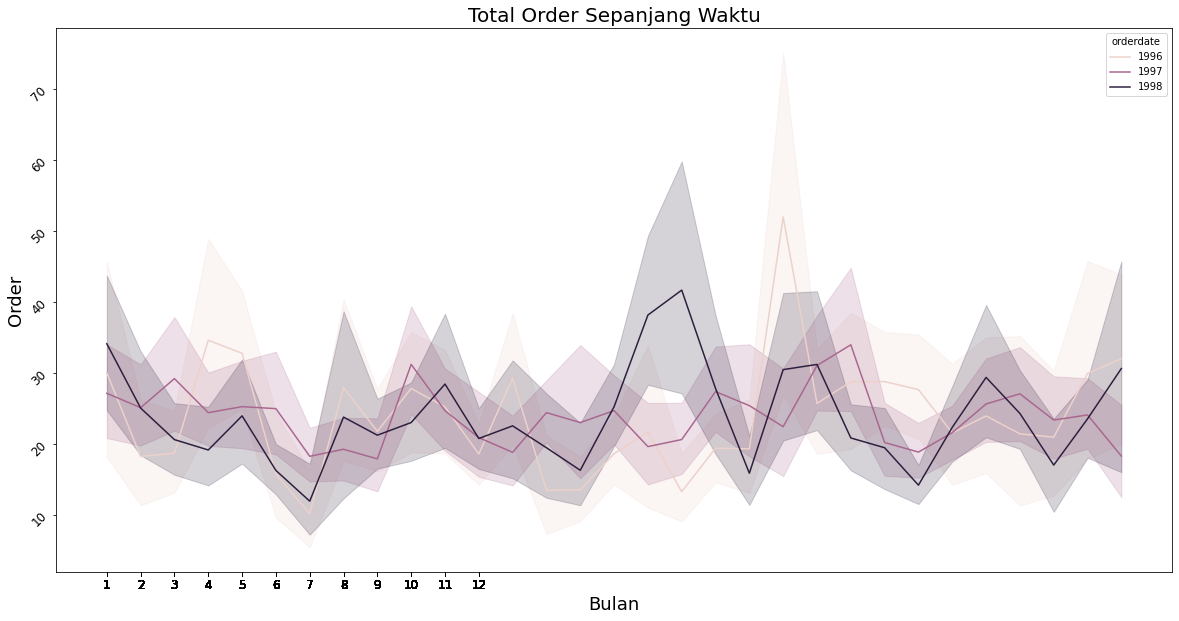

In [54]:
# Line Plot Profit Each Month

plt.figure(figsize=(20,10))
sns.lineplot(data=tabel1, x=pd.DatetimeIndex(tabel1['orderdate']).day, y='quantity', hue = pd.DatetimeIndex(tabel1['orderdate']).year)
plt.title('Total Order Sepanjang Waktu', size = 20)
plt.xlabel('Bulan', size = 18)
plt.ylabel('Order', size = 18)
plt.xticks(pd.DatetimeIndex(tabel1['orderdate']).month, size = 12)
plt.yticks(rotation = 45, size = 12)
plt.show()

In [ ]:
plt.style.use('seaborn')
plt.figure(figsize=(20,10))
plt.plot(yearprof.index, yearprof['Profit'], 'ro-')
plt.title('Profit 2003 - 2005 Penjualan Kendaraan', size = 20)
plt.xlabel('Tahun', size = 18)
plt.ylabel('Keuntungan', size = 18)
plt.xticks(yearprof.index, rotation = 90, size = 12)
plt.yticks(rotation = 45, size = 12)

for x,y in zip(yearprof.index, round(yearprof['Profit'],1)) :
    plt.annotate(y,
    (x,y),
    textcoords = 'offset pixels',
    xytext = (1,15))

plt.show()

perbandingan nilai/proporsi Uji dengan metode yang sesuai kebutuhan
analisis.
2. Analisis hubungan antara fokus analisis dengan variabel lain.
3. Penjelasan insight dari hasil uji statistika deskriptif dan inferensial
berdasarkan keperluan/masalah bisnis.

## **Uji Korelasi**

C:\Users\Salsabila\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UnitPrice', ylabel='quantity'>

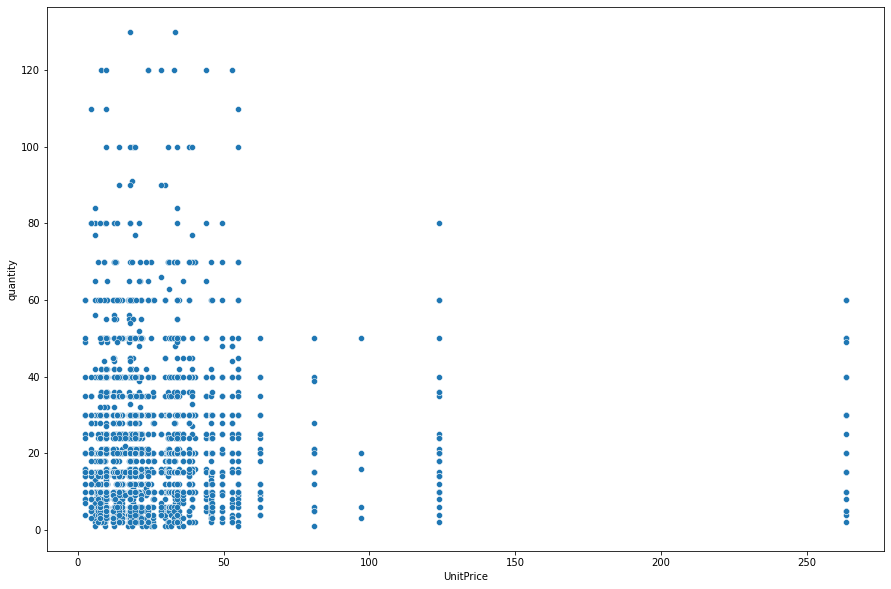

In [67]:
plt.figure(figsize=(15,10))
sns.scatterplot(tabel1['UnitPrice'], tabel1['quantity'])

Beverages', 'Condiments', 'Confections', 'Dairy Products', 'Grains/Cereals', 'Meat/Poultry', 'Produce', dan 'Seafood'.

## **Uji Perbandingan Nilai**

In [83]:
import warnings
warnings.filterwarnings("ignore")

**1. Normality Asessment**

<function matplotlib.pyplot.show(close=None, block=None)>

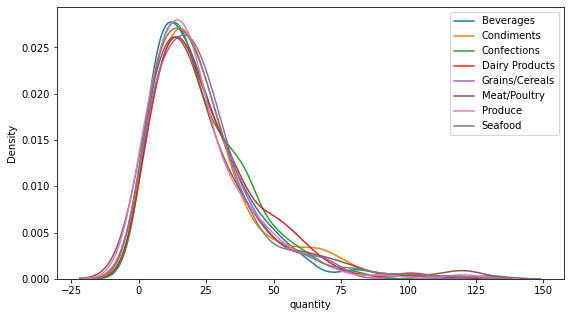

In [84]:
category = ['Beverages', 'Condiments', 'Confections', 'Dairy Products', 'Grains/Cereals', 'Meat/Poultry', 'Produce', 'Seafood']

plt.figure(figsize = (20,5))
plt.subplot(1,2,2)
for i in category:
       sns.distplot(tabel1[tabel1['categoryname'] == i]['quantity'], hist = False, label = i)
plt.legend(loc="upper right")
plt.show


**2. Kolmogorov Smirnov**

In [91]:
from scipy.stats import kstest
category = ['Beverages', 'Condiments', 'Confections', 'Dairy Products', 'Grains/Cereals', 'Meat/Poultry', 'Produce', 'Seafood']

for i in category:
       statistic, pvalue = kstest(tabel1['quantity'], 'norm')

print(f'pvalue = {pvalue}')
print(f'statistic = {statistic}')


pvalue = 0.0
statistic = 0.9693612369613336


Dari data diatas dapat disimpulkan bahwa nilai p.value lebih kecil dari 0.05, maka kita akan menolak H0, maka data tidak mengikuti distribusi normal.

**3. Kruskal-Wall Test**


1. h0: rata-rata orderan antar category kurang lebih sama <br>
2. ha: rata-rata orderan antar category kurang lebih sama, namun tidak bisa ditentukan yang sama <br>

In [93]:
#import library
from scipy.stats import kruskal

#kruskal test
krus, pvalkrus = kruskal(tabel1[tabel1['categoryname'] == 'Beverages']['quantity'],
                      tabel1[tabel1['categoryname'] == 'Condiments']['quantity'],
                      tabel1[tabel1['categoryname'] == 'Confections']['quantity'],
                      tabel1[tabel1['categoryname'] == 'Dairy Products']['quantity'],
                      tabel1[tabel1['categoryname'] == 'Grains/Cereals']['quantity'],
                      tabel1[tabel1['categoryname'] == 'Meat/Poultry']['quantity'],
                      tabel1[tabel1['categoryname'] == 'Produce']['quantity'],
                      tabel1[tabel1['categoryname'] == 'Seafood']['quantity'],
)

if pvalkrus < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pvalkrus} < 0.05)')
    print ('Rata-rata order antar kategori tidak sama')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pvalkrus} > 0.05)')
    print ('Rata-rata order antar kategori sama')

Gagal Tolak H0 Karena P-Value (0.5642938672733733 > 0.05)
Rata-rata order antar kategori sama


- Tolak H0: P-Value kurang dari sama daengan alpha ( ), misalnya 0.05
- Terima H0: P-Value lebih dari alpha ( ), misalnya 0.05

Pada case ini berarti kita akan menerima H0, rata-rata order antar kategori sama.

In [ ]:
sql_df('''
select count(supplierid) as total, City, Country
from suppliers
group by country
order by total desc, country;
''')


,total,City,Country
0,4,New Orleans,USA
1,3,Paris,France
2,3,Berlin,Germany
3,2,Melbourne,Australia
4,2,Montral,Canada
5,2,Ravenna,Italy
6,2,Tokyo,Japan
7,2,Gteborg,Sweden
8,2,London,UK
9,1,So Paulo,Brazil


In [ ]:
o.orderdate, o.requireddate, o.shippeddate, o.freight, o.shipcity, o.ship country,


SyntaxError: invalid syntax (335836466.py, line 1)